In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 58.5 MB/s eta 0:00:00


### Libraries

In [22]:
from sklearn.datasets import load_iris
import os
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import Input, Model, regularizers
import visualkeras
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, Reshape
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from keras import regularizers
from keras.regularizers import l1, l2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

### Dataset loading

In [3]:
iris = load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [11]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
np.shape(X)

(150, 4)

In [13]:
y = pd.DataFrame(data=iris.target, columns=["irisType"])

In [15]:
y.head()

,irisType
0,0
1,0
2,0
3,0
4,0


In [60]:
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
np.shape(y)

(150, 1)

In [18]:
y.irisType.value_counts()

0    50
1    50
2    50
Name: irisType, dtype: int64

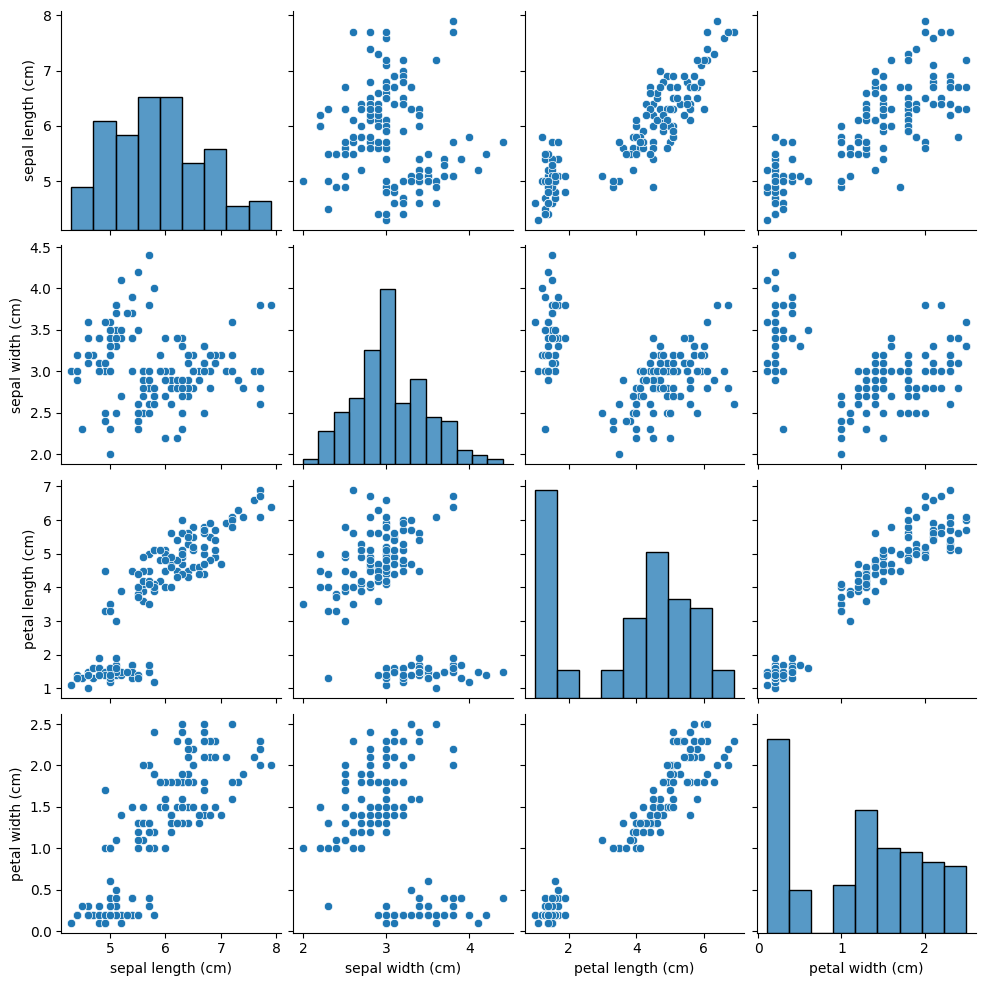

In [19]:
sns.pairplot(X)
plt.show(sns)

### Data Preprocessing
- Filling missing values: X.info() -> filling w/mean method or removing NaNs
- Splitting train/validation sets: train_test_split
- Normalization
- One Hot Encoder for categorical datas

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(135, 4)
(15, 4)
(135, 1)
(15, 1)



In the dataset, 

If the variance is high, data is being normalized. Due to this dataset's data's variance is lower, it is not required to normalize the data.


In [28]:
X_train.var(), X_test.var()

(sepal length (cm)    0.694776
 sepal width (cm)     0.191114
 petal length (cm)    3.107892
 petal width (cm)     0.578925
 dtype: float64,
 sepal length (cm)    0.638095
 sepal width (cm)     0.192667
 petal length (cm)    3.318095
 petal width (cm)     0.623524
 dtype: float64)

In [31]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [37]:
Y_train[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)


Output data is numpy array.
Input data is pandas data frame.
For the model, it is required to convert input datas into numpy array.
- .values


In [39]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [40]:
X_train = X_train.values
X_test = X_test.values

In [41]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [45]:
X_train[:5]

array([[6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2]])

### Creating Model

In [47]:
model = tf.keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=X_train[0].shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 25,539
Trainable params: 25,539
Non-trainable params: 0
_________________________________________________________________


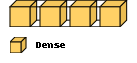

In [50]:
# Visualization
visualkeras.layered_view(model, legend=True)

### Model Configuration

In [51]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model fitting

In [52]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=7, 
                    validation_split=0.1)

Epoch 1/7
4/4 [==============================] - 6s 74ms/step - loss: 0.9833 - accuracy: 0.5537 - val_loss: 0.8481 - val_accuracy: 0.5000
Epoch 2/7
4/4 [==============================] - 0s 12ms/step - loss: 0.8072 - accuracy: 0.7190 - val_loss: 0.7976 - val_accuracy: 0.9286
Epoch 3/7
4/4 [==============================] - 0s 11ms/step - loss: 0.6947 - accuracy: 0.7686 - val_loss: 0.7010 - val_accuracy: 0.6429
Epoch 4/7
4/4 [==============================] - 0s 11ms/step - loss: 0.5902 - accuracy: 0.6860 - val_loss: 0.6192 - val_accuracy: 0.6429
Epoch 5/7
4/4 [==============================] - 0s 11ms/step - loss: 0.5247 - accuracy: 0.7107 - val_loss: 0.5686 - val_accuracy: 0.6429
Epoch 6/7
4/4 [==============================] - 0s 11ms/step - loss: 0.4691 - accuracy: 0.8512 - val_loss: 0.5460 - val_accuracy: 0.9286
Epoch 7/7
4/4 [==============================] - 0s 17ms/step - loss: 0.4298 - accuracy: 0.9587 - val_loss: 0.5055 - val_accuracy: 0.9286


### Evaluation

In [58]:
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)
print("Train Accuracy: %.2f%%" % (train_acc*100))
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (test_acc*100))

Train Accuracy: 94.07%
Test Accuracy: 93.33%


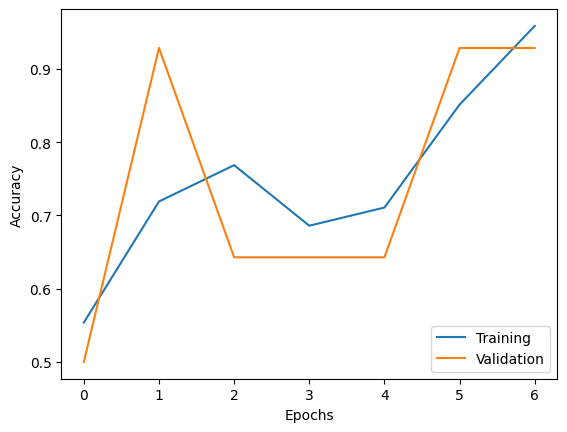

In [62]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.show()

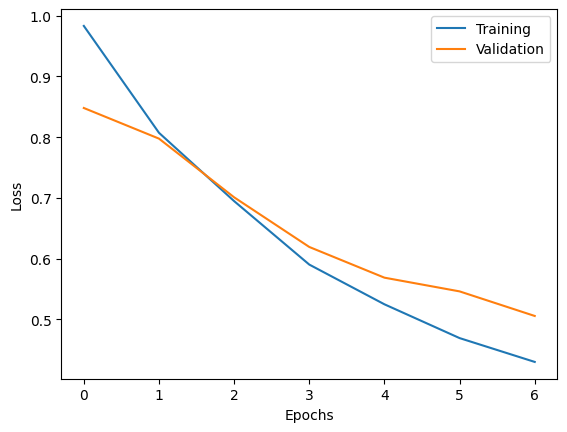

In [63]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show()

1/1 [==============================] - 0s 82ms/step
Accuracy: 0.9333333333333333
Precision: 0.9166666666666666
Recall: 0.9444444444444445
F1 Score: 0.9220779220779222


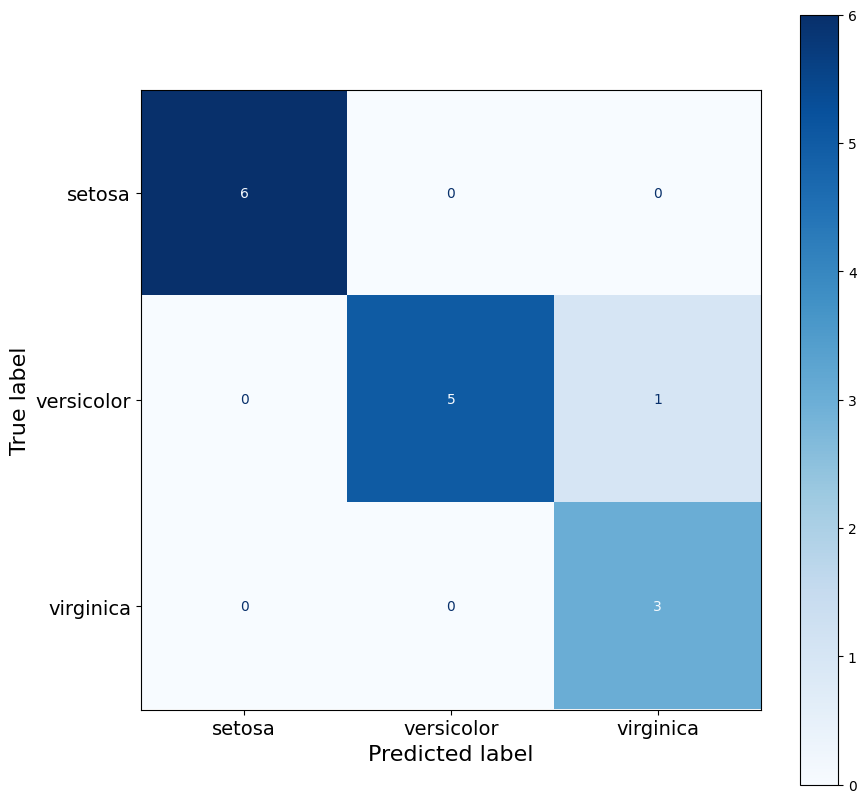

In [61]:
Y_pred = model.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_cal = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_test_cal, Y_pred)
precision = precision_score(Y_test_cal, Y_pred, average='macro')
recall = recall_score(Y_test_cal, Y_pred, average='macro')
f1 = f1_score(Y_test_cal, Y_pred, average='macro')
cm = confusion_matrix(Y_test_cal, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()